<a href="https://colab.research.google.com/github/wanickols01/LearningMLandDL/blob/main/Linear_Regression_Exercise_1_House_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales Prediction

##Imports and connecting to google drive

In [75]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy as np


# Mount Google Drive
try:
    drive.mount("/content/drive")
except:
    print("Google Drive already mounted")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Load the data into a Pandas DataFrame
filename = "/content/drive/My Drive/Colab Notebooks/Data/ex1data2.txt"
col_names = ["Size", "Bedrooms", "Price"]
data = pd.read_csv(filename, header=None, names=col_names)

## Generating a Regression Line and plotting it

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


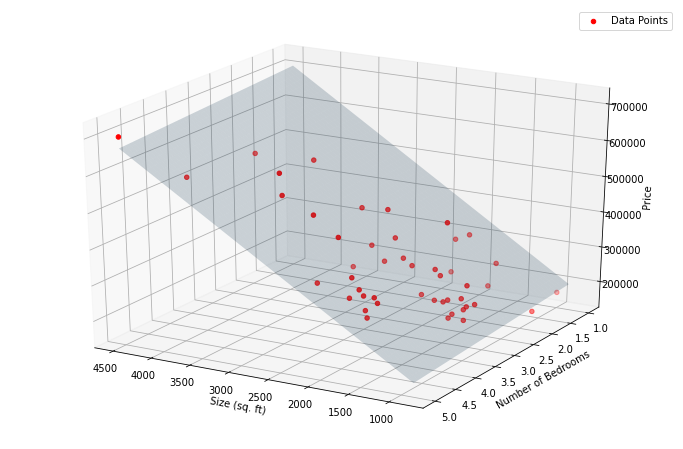

In [77]:
# Fit a linear regression model
model = LinearRegression()
X = data[["Size", "Bedrooms"]]
y = data["Price"]
model.fit(X, y)



# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8)) #sets size in inch
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Size"], data["Bedrooms"], data["Price"], color='red', label='Data Points')
ax.set_xlabel("Size (sq. ft)")
ax.set_ylabel("Number of Bedrooms")
ax.set_zlabel("Price")
ax.legend(loc='best')

# Plot the regression line
x_min = data["Size"].min()
x_max = data["Size"].max()
y_min = data["Bedrooms"].min()
y_max = data["Bedrooms"].max()
X_vals, Y_vals = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z_vals = model.predict(np.c_[X_vals.ravel(), Y_vals.ravel()])
Z_vals = Z_vals.reshape(X_vals.shape)
ax.plot_surface(X_vals, Y_vals, Z_vals, alpha=0.2)

# Adjust the viewing angle
ax.view_init(elev=25, azim=120)
plt.show()
